<a href="https://colab.research.google.com/github/eyalhagai12/ColabDataScience/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import relevant libraries and explore and analyse data



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!unzip /content/drive/MyDrive/colab_datasets/titanic.zip

Archive:  /content/drive/MyDrive/colab_datasets/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train_data = pd.read_csv("train.csv")

train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# get features and label
x = train_data.drop(["Survived"], axis=1)
y = train_data["Survived"]

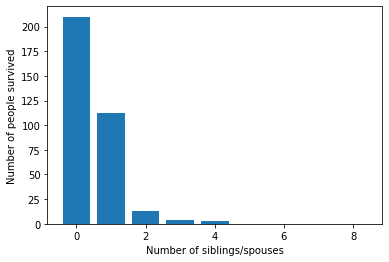

In [ ]:
# plot data to see relationships, count the amount of people survived
# number of siblings in relation to survival

num_of_siblings = [i for i in range(9)]
sur = [0 for i in range(9)]

for num, survived in zip(x['SibSp'], y):
  if survived == 1:
    sur[num] += 1

plt.bar(num_of_siblings, sur)
plt.xlabel("Number of siblings/spouses")
plt.ylabel("Number of people survived")
plt.show()

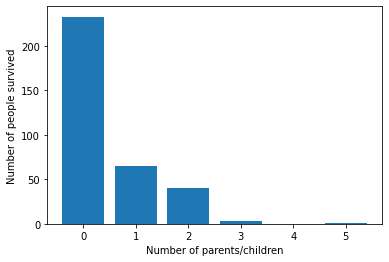

In [ ]:
# number of parents in relation to survival
num_of_parents = [i for i in range(6)]
sur = [0 for i in range(6)]

for num, survived in zip(x['Parch'], y):
  if survived == 1:
    sur[num] += 1

plt.bar(num_of_parents, sur)
plt.xlabel("Number of parents/children")
plt.ylabel("Number of people survived")
plt.show()

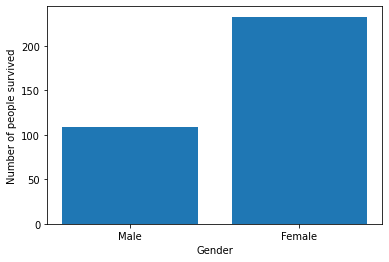

In [ ]:
# gender in relation to survival
gend = ["Male", "Female"]

sur = {
    "male": 0,
    "female": 0
}

for survived, gender in zip(y, x['Sex']):
  if survived == 1:
    sur[gender] += 1

sur = [sur[k] for k in sur.keys()]

plt.bar(gend, sur)
plt.xlabel("Gender")
plt.ylabel("Number of people survived")
plt.show()

In [ ]:
# ages in relation to survival
ages = [i for i in range(80)]
sur = [0 for i in range(80)]

for survived, age in zip(y, x['Age']):
  if survived == 1:
    try:
      idx = int(age)
      sur[idx] += 1
    except:
      print("NaN value found, ignoring it")

NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value found, ignoring it
NaN value foun

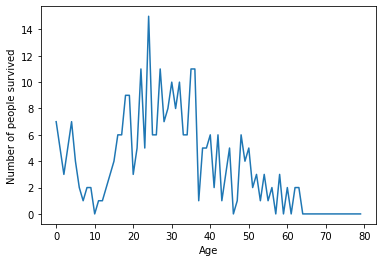

In [ ]:
plt.plot(ages, sur)
plt.xlabel("Age")
plt.ylabel("Number of people survived")
plt.show()

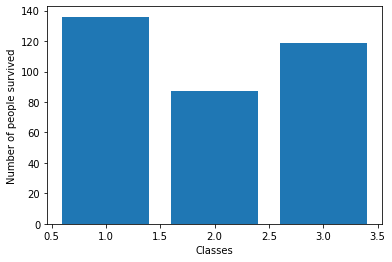

In [ ]:
# class in relation to survival
classes = [i for i in range(1,4)]
sur = [0 for i in range(1,4)]

for cls, survived in zip(x['Pclass'], y):
  if survived == 1:
    sur[cls - 1] += 1

plt.bar(classes, sur)
plt.xlabel("Classes")
plt.ylabel("Number of people survived")
plt.show()

In [ ]:
# city embarked in relation to survival

emb = ["C", "Q", "S"]
sur = [0 for x in emb]

keys = {
    "C": 0,
    "Q": 1,
    "S": 2
}

for survived, embarked in zip(y, x['Embarked']):
  if survived == 1:
    try:
      sur[keys[embarked]] += 1
    except:
      print("nan value found, ignoring it")

nan value found, ignoring it
nan value found, ignoring it


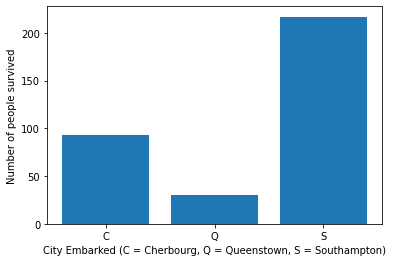

In [ ]:
plt.bar(emb, sur)
plt.xlabel("City Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Number of people survived")
plt.show()

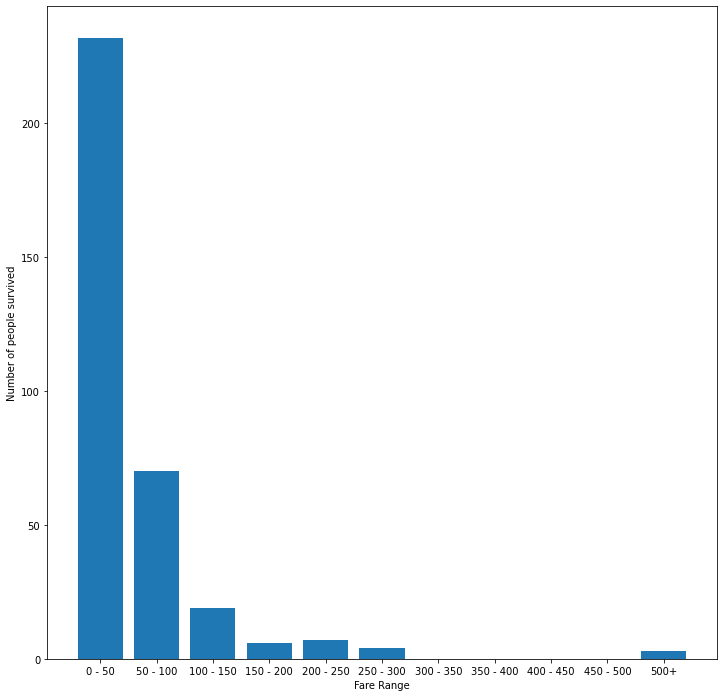

In [ ]:
fares = [str(50*x) + " - " + str(50 * (x + 1)) for x in range(10)] + ["500+"]
sur = [0 for x in range(11)]

for fare, survived in zip(x['Fare'], y):
  if survived == 1:
    for i in range(11):
      if fare < 50 * (i + 1) and fare > i*50:
        sur[i] += 1

plt.figure(figsize=(12, 12))
plt.bar(fares, sur)
plt.xlabel("Fare Range")
plt.ylabel("Number of people survived")
plt.show()

# Prepare data



In [ ]:
# import preprocessing stuff
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# drop irrelevant columns
to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
x = x.drop(to_drop, axis=1)


In [ ]:
# get categorical and numerical columns
categorical = [col for col in x.columns if x[col].dtype == "object"] + ["Pclass"]
numerical = [col for col in x.columns if col not in categorical]

In [ ]:
# preprocess the data

numerical_transformer = Pipeline([
                                  ("impute", SimpleImputer()),
])

categorical_transformer = Pipeline([
                                    ("imputer", SimpleImputer(strategy="most_frequent")),
                                    ("encoding", OneHotEncoder(dtype=np.int32)),
])

preprocessor = ColumnTransformer([
                                  ("numerical", numerical_transformer, numerical),
                                  ("categorical", categorical_transformer, categorical)
])

X = preprocessor.fit_transform(x)

In [ ]:
# split to train and test data
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X, y, random_state=42)

# Try different models

In [ ]:
# import models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB, ComplementNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
# initiate models
models = {
    "logistic_regression": LogisticRegression(),
    "SGDC": SGDClassifier(),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(),
    "xgboost": XGBClassifier(),
    "xgbrfc": XGBRFClassifier(),
    "gaussin_nb": GaussianNB(),
    "categorical_nb": CategoricalNB(),
    "complement_nb": ComplementNB(),
    "bernoulli_nb": BernoulliNB(),
    "knn": KNeighborsClassifier(),
    "svc": SVC()
}

for model in models:
  print("-----------------------------")
  print("Training: " + model)
  models[model].fit(x_train, y_train)
  print("Score: " + str(models[model].score(x_val, y_val)))
  print("-----------------------------")


In [ ]:
# next thing to do is to make functions for each model to check different parameters and how they improve the acuracy